In [3]:
import pandas as pd

In [4]:
friday= pd.read_csv('friday.csv', sep= ';')

In [5]:
friday.head()

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1,dairy
1,2019-09-06 07:00:00,2,drinks
2,2019-09-06 07:00:00,3,fruit
3,2019-09-06 07:01:00,2,checkout
4,2019-09-06 07:01:00,4,drinks


In [6]:
thursday= pd.read_csv('thursday.csv', sep= ';')

In [7]:
monday= pd.read_csv('monday.csv', sep= ';')

In [8]:
tuesday= pd.read_csv('tuesday.csv', sep= ';')

In [9]:
wednsday= pd.read_csv('wednesday.csv', sep= ';')

In [10]:
monday['customer_id']= monday['customer_no'].apply(lambda x: '{}{}'.format('mon_', x))

In [11]:
#monday.loc[monday['customer_no']==666]

In [12]:
tuesday['customer_id']= tuesday['customer_no'].apply(lambda x: '{}{}'.format('tue_', x))

In [13]:
wednsday['customer_id']=wednsday['customer_no'].apply(lambda x: '{}{}'.format('wed_', x))

In [14]:
thursday['customer_id']= thursday['customer_no'].apply(lambda x: '{}{}'.format('thur_', x))

In [15]:
friday['customer_id']= friday['customer_no'].apply(lambda x: '{}{}'.format('fri_', x))

In [16]:
friday.head()

,timestamp,customer_no,location,customer_id
0,2019-09-06 07:00:00,1,dairy,fri_1
1,2019-09-06 07:00:00,2,drinks,fri_2
2,2019-09-06 07:00:00,3,fruit,fri_3
3,2019-09-06 07:01:00,2,checkout,fri_2
4,2019-09-06 07:01:00,4,drinks,fri_4


In [17]:
monday.drop("customer_no", axis=1, inplace=True)

In [18]:
tuesday.drop("customer_no", axis=1, inplace=True)

In [19]:
wednsday.drop("customer_no", axis=1, inplace=True)

In [20]:
thursday.drop("customer_no", axis=1, inplace=True)

In [21]:
friday.drop("customer_no", axis=1, inplace=True)

In [22]:
friday.head()

,timestamp,location,customer_id
0,2019-09-06 07:00:00,dairy,fri_1
1,2019-09-06 07:00:00,drinks,fri_2
2,2019-09-06 07:00:00,fruit,fri_3
3,2019-09-06 07:01:00,checkout,fri_2
4,2019-09-06 07:01:00,drinks,fri_4


In [23]:
#monday.index=pd.to_datetime(friday.index)
monday.set_index("timestamp", inplace=True)
#monday.index=pd.to_datetime(monday.index)

In [24]:
type(monday.index)

pandas.core.indexes.base.Index

In [25]:
monday.index=pd.to_datetime(monday.index)

In [26]:
type(monday.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [27]:
monday.head()

,location,customer_id
timestamp,,
2019-09-02 07:03:00,dairy,mon_1
2019-09-02 07:03:00,dairy,mon_2
2019-09-02 07:04:00,dairy,mon_3
2019-09-02 07:04:00,dairy,mon_4
2019-09-02 07:04:00,spices,mon_5


In [28]:
tuesday.set_index("timestamp", inplace=True)

In [29]:
tuesday.index=pd.to_datetime(tuesday.index)

In [30]:
wednsday.set_index("timestamp", inplace=True)

In [31]:
wednsday.index=pd.to_datetime(wednsday.index)

In [32]:
thursday.set_index("timestamp", inplace=True)

In [33]:
thursday.index=pd.to_datetime(thursday.index)

In [34]:
friday.set_index("timestamp", inplace=True)

In [35]:
friday.index= pd.to_datetime(friday.index)

In [36]:
friday.head()

,location,customer_id
timestamp,,
2019-09-06 07:00:00,dairy,fri_1
2019-09-06 07:00:00,drinks,fri_2
2019-09-06 07:00:00,fruit,fri_3
2019-09-06 07:01:00,checkout,fri_2
2019-09-06 07:01:00,drinks,fri_4


In [37]:
all_days=pd.concat([monday,tuesday,wednsday,thursday,friday])

In [38]:
all_days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     24877 non-null  object
 1   customer_id  24877 non-null  object
dtypes: object(2)
memory usage: 583.1+ KB


In [39]:
#Calculate the total number of customers in each section

In [40]:
cus_at_each_loction=all_days.groupby(['location']).count()

In [41]:
cus_at_each_loction

,customer_id
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


In [42]:
#Calculate the total number of customers in each section over time

In [43]:
all_days["location"].unique()


array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

In [44]:
customer_per_loc_over_time=all_days.groupby(['location']).resample('1H').count()

In [45]:
customer_per_loc_over_time.head()

location  customer_id
location timestamp                                 
checkout 2019-09-02 07:00:00        92           92
         2019-09-02 08:00:00       112          112
         2019-09-02 09:00:00        85           85
         2019-09-02 10:00:00        90           90
         2019-09-02 11:00:00        55           55

In [46]:
#import seaborn as sns
#import matplotlib as plt

In [47]:
df_plot=customer_per_loc_over_time.drop("location", axis= 1)

In [48]:
df_plot.head()

customer_id
location timestamp                       
checkout 2019-09-02 07:00:00           92
         2019-09-02 08:00:00          112
         2019-09-02 09:00:00           85
         2019-09-02 10:00:00           90
         2019-09-02 11:00:00           55

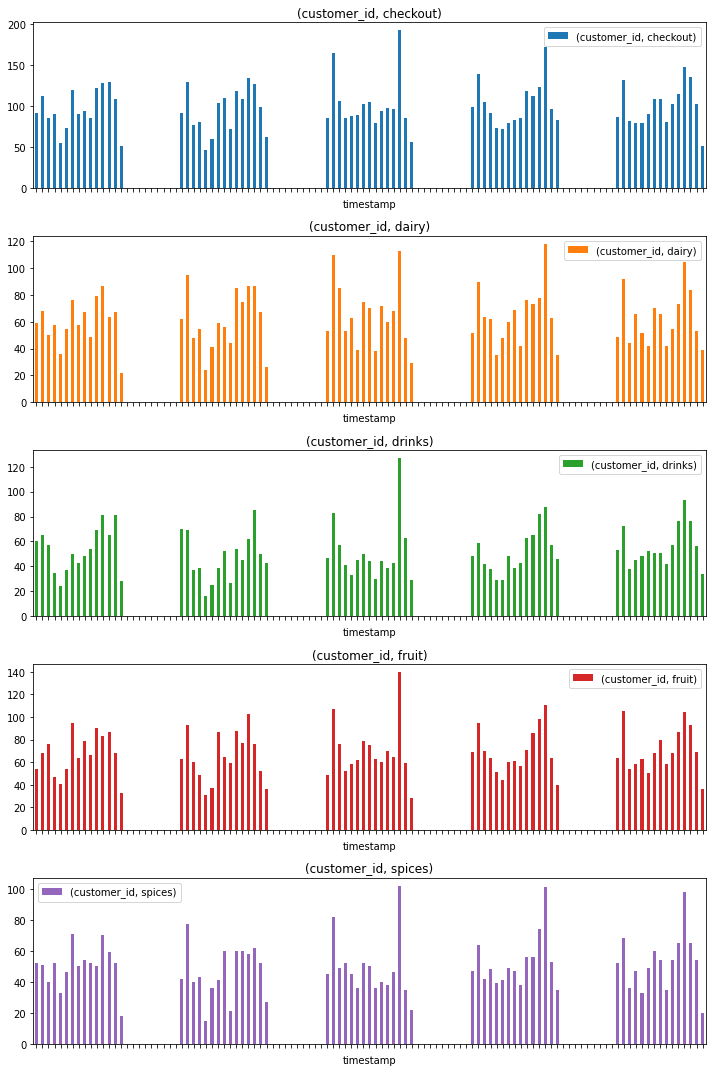

In [49]:
import matplotlib as mdates
import pylab as plt
fig= plt.figure(figsize=(10,15))
axes=[]
axes.append(fig.add_subplot(511))
axes.append(fig.add_subplot(512))
axes.append(fig.add_subplot(513))
axes.append(fig.add_subplot(514))
axes.append(fig.add_subplot(515))
df_plot.unstack(level= 0).plot(kind="bar", subplots= True, rot=0, figsize=(6, 20), ax=axes)

import numpy as np
for ax in axes:
    ax.set_xticklabels([])
    #ax.set_xticklabels(np.arange(7, 22, 1))
plt.tight_layout()

In [50]:
df_sum=df_plot.unstack(level= 0)
df_sum

customer_id                          
location               checkout dairy drinks fruit spices
timestamp                                                
2019-09-02 07:00:00          92    59     60    54     52
2019-09-02 08:00:00         112    68     65    68     51
2019-09-02 09:00:00          85    50     57    76     40
2019-09-02 10:00:00          90    58     35    47     52
2019-09-02 11:00:00          55    36     24    41     33
...                         ...   ...    ...   ...    ...
2019-09-06 17:00:00         115    73     76    87     65
2019-09-06 18:00:00         148   105     93   104     98
2019-09-06 19:00:00         135    84     76    93     65
2019-09-06 20:00:00         103    53     56    69     54
2019-09-06 21:00:00          52    39     34    36     20

[111 rows x 5 columns]

In [51]:
#df_sum.info()

#Total = df['MyColumn'].sum()
df_sum["customer_id", "checkout"].sum()

7417

In [52]:
df_sum["customer_id", "dairy"].sum()


4679

In [53]:
df_sum["customer_id", "drinks"].sum()

3905

In [54]:
df_sum["customer_id", "fruit"].sum()

5122

In [55]:
df_sum["customer_id", "spices"].sum()

3754